In [1]:
import pandas as pd

HSales=pd.read_csv('/cxldata/datasets/project/sales_historical_sales_value.csv')

HPI=pd.read_csv('/cxldata/datasets/project/sales_disposable_personal_income.csv')

##Merging HSales & HPI on the 'time'field which is the common field between the 2 datasets

full=pd.merge(HSales,HPI,on='time')

###This might look like a time series problem but we will transform it to supervised machine learning problem by doing
#some basic feature engineering 


###time column is an object.We need to parse it to work efficiently with it.


from datetime import datetime

from dateutil.parser import parse

date = []

for i in full['time']:
    i=parse(i)
    
    date.append(i)
full['date']=date

##Lets extract month of year and week of year now

full['week']=full['date'].dt.week

full['month']=full['date'].dt.month

full['year']=full['date'].dt.year


full=full.rename(columns={'value_x':'Sales','value_y':'Personal_Income'})

full

,ID1,ID2,time,Sales,Personal_Income,date,week,month,year
0,1,2,11/13/2010 12:00:00 AM,130,11160.8,2010-11-13,45,11,2010
1,2,1,11/13/2010 12:00:00 AM,142,11160.8,2010-11-13,45,11,2010
2,3,1,11/13/2010 12:00:00 AM,70,11160.8,2010-11-13,45,11,2010
3,4,2,11/13/2010 12:00:00 AM,314,11160.8,2010-11-13,45,11,2010
4,5,1,11/13/2010 12:00:00 AM,108,11160.8,2010-11-13,45,11,2010
...,...,...,...,...,...,...,...,...,...
2454,11,1,11/6/2010 12:00:00 AM,122,11160.8,2010-11-06,44,11,2010
2455,12,1,11/6/2010 12:00:00 AM,1270,11160.8,2010-11-06,44,11,2010
2456,13,1,11/6/2010 12:00:00 AM,958,11160.8,2010-11-06,44,11,2010
2457,14,1,11/6/2010 12:00:00 AM,412,11160.8,2010-11-06,44,11,2010


In [2]:
##Date time features are a good start.But it is more valuable to include values from previous time steps.These 
#are called lag values
#In the project guidelines we are told (and it is but obvious) that personal disposable income is a leading indicator.
#This means that before sales change the personal income changes but we do not know after how many weeks.
#I have created a variable capturing the change in personal disposable income,also created variables with shifted 
#change in personal income by 1 week and 2 weeks


full=full.sort_values(by='date')
full['Change_Personal_Income']=full.groupby(['ID1','ID2'])['Personal_Income'].diff()




full['Change_Personal_Income_Lag1']=full.groupby(['ID1','ID2'])['Change_Personal_Income'].shift(1)
full['Change_Personal_Income_Lag2']=full.groupby(['ID1','ID2'])['Change_Personal_Income'].shift(2)




In [3]:
#Another lagged variable  called last weeks sale

full['LastWeekSale']=full.groupby(['ID1','ID2'])['Sales'].shift(1)

In [4]:
##Lets see how our engineered features look for store 1 product 1.Store 1 does not seem to sell product 2

store1=full[full['ID1']==1]

store1product2=store1[store1['ID2']==2]

In [5]:
store1product2.head(50)

,ID1,ID2,time,Sales,Personal_Income,date,week,month,year,Change_Personal_Income,Change_Personal_Income_Lag1,Change_Personal_Income_Lag2,LastWeekSale
0,1,2,11/13/2010 12:00:00 AM,130,11160.8,2010-11-13,45,11,2010,NaN,NaN,NaN,NaN
15,1,2,11/20/2010 12:00:00 AM,222,11160.8,2010-11-20,46,11,2010,0.0,NaN,NaN,130.0
30,1,2,11/27/2010 12:00:00 AM,166,11160.8,2010-11-27,47,11,2010,0.0,0.0,NaN,222.0
45,1,2,12/4/2010 12:00:00 AM,174,11239.0,2010-12-04,48,12,2010,78.2,0.0,0.0,166.0
60,1,2,12/11/2010 12:00:00 AM,236,11239.0,2010-12-11,49,12,2010,0.0,78.2,0.0,174.0
75,1,2,12/18/2010 12:00:00 AM,350,11239.0,2010-12-18,50,12,2010,0.0,0.0,78.2,236.0
90,1,2,12/25/2010 12:00:00 AM,216,11239.0,2010-12-25,51,12,2010,0.0,0.0,0.0,350.0
105,1,2,1/1/2011 12:00:00 AM,230,11297.4,2011-01-01,52,1,2011,58.4,0.0,0.0,216.0
120,1,2,1/8/2011 12:00:00 AM,268,11297.4,2011-01-08,1,1,2011,0.0,58.4,0.0,230.0
135,1,2,1/15/2011 12:00:00 AM,332,11297.4,2011-01-15,2,1,2011,0.0,0.0,58.4,268.0


In [6]:
##Because of lagged variables we have rows containing NaN.We need to drop these rows from the dataframe

full=full.dropna()

full.shape
##We have extracted month,date and year from the date and time columns.We would now drop these
fullfinal=full.drop(['date','time'],axis=1)

fullfinal



,ID1,ID2,Sales,Personal_Income,week,month,year,Change_Personal_Income,Change_Personal_Income_Lag1,Change_Personal_Income_Lag2,LastWeekSale
43,14,1,506,11160.8,47,11,2010,0.0,0.0,0.0,574.0
42,13,1,1058,11160.8,47,11,2010,0.0,0.0,0.0,1164.0
41,12,1,1366,11160.8,47,11,2010,0.0,0.0,0.0,1412.0
40,11,1,116,11160.8,47,11,2010,0.0,0.0,0.0,134.0
39,10,1,110,11160.8,47,11,2010,0.0,0.0,0.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...
2433,4,2,278,11696.6,52,12,2013,0.0,0.0,0.0,314.0
2432,3,1,50,11696.6,52,12,2013,0.0,0.0,0.0,70.0
2431,2,1,184,11696.6,52,12,2013,0.0,0.0,0.0,196.0
2443,14,1,694,11696.6,52,12,2013,0.0,0.0,0.0,742.0


In [7]:
#Lets examine our dependant variable---Sales

full['Sales'].describe()





count    2414.000000
mean      392.640431
std       350.296436
min        28.000000
25%       150.000000
50%       272.000000
75%       506.000000
max      2314.000000
Name: Sales, dtype: float64

In [8]:
#Lets see how the Sales variable looks

import seaborn as sns

sns.distplot(fullfinal['Sales'])



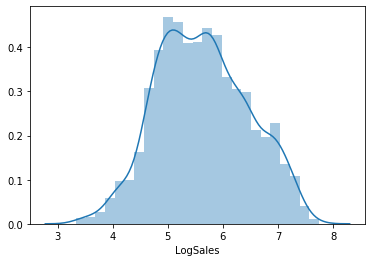

In [9]:
##Observations on the Sales variable
#It deviates from normal distribution
# It has appreciable positive skewness
#It displays peakedness
#We would do log transformation on this to make the distribution of the dependent variable normal.
#A normally distributed dependent variable always yields better results.

import numpy as np

fullfinal['LogSales']=np.log(fullfinal['Sales'])

sns.distplot(fullfinal['LogSales'])



In [10]:
#drop Sales column as we would be using logsales

fullfinal=fullfinal.drop(['Sales'],axis=1)

#Prepare the test and train set.We will only take year 2013 for test and the previous 2 years as train

test=fullfinal[fullfinal['year']==2013]

train=fullfinal[fullfinal['year']<2013]


In [11]:
print('training set shape is:',train.shape)
print('test set shape is:',test.shape)

training set shape is: (1649, 11)
test set shape is: (765, 11)


In [12]:
##lets see the correlation between various features and between explanatory and dependant variable
corrmatrix=fullfinal.corr(method='pearson')

In [13]:
corrmatrix

,ID1,ID2,Personal_Income,week,month,year,Change_Personal_Income,Change_Personal_Income_Lag1,Change_Personal_Income_Lag2,LastWeekSale,LogSales
ID1,1.000000,-0.498544,-0.001251,0.000864,0.000824,-0.001480,-0.000033,-0.000033,-0.000033,0.463951,0.463773
ID2,-0.498544,1.000000,0.001971,-0.001361,-0.001297,0.002331,0.000052,0.000052,0.000052,-0.125892,-0.015471
Personal_Income,-0.001251,0.001971,1.000000,0.279504,0.296556,0.687247,0.136637,0.136637,0.136637,-0.063768,-0.044490
week,0.000864,-0.001361,0.279504,1.000000,0.964073,-0.118847,0.161540,0.146485,0.149711,-0.139667,-0.145702
month,0.000824,-0.001297,0.296556,0.964073,1.000000,-0.109611,0.153288,0.153288,0.153288,-0.143165,-0.146326
year,-0.001480,0.002331,0.687247,-0.118847,-0.109611,1.000000,-0.085793,-0.085793,-0.085793,-0.027927,0.002064
Change_Personal_Income,-0.000033,0.000052,0.136637,0.161540,0.153288,-0.085793,1.000000,-0.002450,-0.002450,-0.003037,-0.014032
Change_Personal_Income_Lag1,-0.000033,0.000052,0.136637,0.146485,0.153288,-0.085793,-0.002450,1.000000,-0.002450,-0.012670,-0.006605
Change_Personal_Income_Lag2,-0.000033,0.000052,0.136637,0.149711,0.153288,-0.085793,-0.002450,-0.002450,1.000000,-0.006773,-0.009225
LastWeekSale,0.463951,-0.125892,-0.063768,-0.139667,-0.143165,-0.027927,-0.003037,-0.012670,-0.006773,1.000000,0.881522


In [14]:
###Observations
##LogSales is most strongly related with LastWeekSales and store.
##This is intuitive....store location is very important for the sale of a product.
###Did not get meaningful correlation bw personal income and logsales...seems I did not use a wider suite of lags

In [15]:
##remove non essential columns and Sales column(dependent variable)from the test & train sets.
##I will model on the below columns

trainfinal=train[['ID1','ID2','week','month','year','Personal_Income','LastWeekSale']]

trainlogsales=train['LogSales']

testfinal=test[['ID1','ID2','week','month','year','Personal_Income','LastWeekSale']]

testlogsales=test['LogSales']

print('training set shape:',trainfinal.shape)
print('test set shape:',testfinal.shape)





training set shape: (1649, 7)
test set shape: (765, 7)


In [16]:
###I would chhose RandomForest Regressor as it always gives me very good results

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[120,150],'max_features':[4,5,6,7],'max_depth':[4,5,6]}]

rfreg=RandomForestRegressor()

grid_search=GridSearchCV(rfreg,param_grid,cv=5,scoring='neg_mean_squared_error')

gs=grid_search.fit(trainfinal,trainlogsales)





In [17]:
gs.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 150}

In [18]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
gs.best_estimator_.feature_importances_

array([1.84864619e-01, 1.52359877e-02, 9.96276639e-03, 4.20910856e-03,
       4.31782622e-04, 3.13492604e-03, 7.82160810e-01])

In [20]:
final_model=gs.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
testlogsales=pd.DataFrame(testlogsales)
testlogsales



,LogSales
1694,5.537334
1680,5.308268
1681,5.087596
1682,3.583519
1683,5.655992
...,...
2433,5.627621
2432,3.912023
2431,5.214936
2443,6.542472


In [24]:
Predict=final_model.predict(testfinal)

Predict=pd.DataFrame(Predict)

Predict

,0
0,5.350460
1,5.269050
2,5.006611
3,4.122666
4,5.596965
...,...
760,5.726880
761,4.178461
762,5.094444
763,6.557219


In [25]:
comparison=pd.concat([testfinal,testlogsales],axis=1)


comparison

,ID1,ID2,week,month,year,Personal_Income,LastWeekSale,LogSales
1694,15,1,1,1,2013,11487.6,206.0,5.537334
1680,1,2,1,1,2013,11487.6,140.0,5.308268
1681,2,1,1,1,2013,11487.6,150.0,5.087596
1682,3,1,1,1,2013,11487.6,30.0,3.583519
1683,4,2,1,1,2013,11487.6,240.0,5.655992
...,...,...,...,...,...,...,...,...
2433,4,2,52,12,2013,11696.6,314.0,5.627621
2432,3,1,52,12,2013,11696.6,70.0,3.912023
2431,2,1,52,12,2013,11696.6,196.0,5.214936
2443,14,1,52,12,2013,11696.6,742.0,6.542472


In [29]:
PredictFinal=Predict.set_index(comparison.index)
PredictFinal=pd.DataFrame(PredictFinal)
PredictFinal.columns=['Predict']
PredictFinal

,Predict
1694,5.350460
1680,5.269050
1681,5.006611
1682,4.122666
1683,5.596965
...,...
2433,5.726880
2432,4.178461
2431,5.094444
2443,6.557219


In [30]:
comparison=pd.concat([comparison,PredictFinal],axis=1)
comparison

,ID1,ID2,week,month,year,Personal_Income,LastWeekSale,LogSales,Predict
1694,15,1,1,1,2013,11487.6,206.0,5.537334,5.350460
1680,1,2,1,1,2013,11487.6,140.0,5.308268,5.269050
1681,2,1,1,1,2013,11487.6,150.0,5.087596,5.006611
1682,3,1,1,1,2013,11487.6,30.0,3.583519,4.122666
1683,4,2,1,1,2013,11487.6,240.0,5.655992,5.596965
...,...,...,...,...,...,...,...,...,...
2433,4,2,52,12,2013,11696.6,314.0,5.627621,5.726880
2432,3,1,52,12,2013,11696.6,70.0,3.912023,4.178461
2431,2,1,52,12,2013,11696.6,196.0,5.214936,5.094444
2443,14,1,52,12,2013,11696.6,742.0,6.542472,6.557219


In [32]:
from sklearn import metrics
print('mean absolute error:',metrics.mean_absolute_error(PredictFinal,testlogsales))
print('mean squared error',metrics.mean_squared_error(PredictFinal,testlogsales))
print('root mean squared error',np.sqrt(metrics.mean_squared_error(PredictFinal,testlogsales)))
print('R2:',metrics.r2_score(testlogsales,PredictFinal))

mean absolute error: 0.15542063098747977
mean squared error 0.04099607880591105
root mean squared error 0.20247488438300454
R2: 0.9376229701903117


In [ ]:
#mean absolute error: 0.16016199233952969
#mean squared error 0.04387914802519593
#root mean squared error 0.20947350196431988
#R2: 0.9332362751728165

In [ ]:
###Feature importances visualisation

importance = Final_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
importances = list(zip(final_model.feature_importances_,trainfinal.columns))
importances.sort(reverse=True)


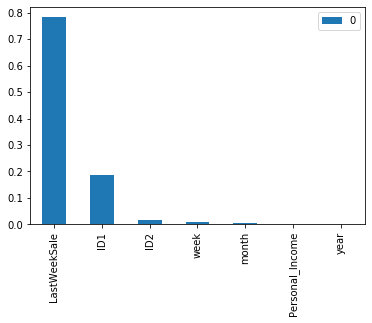

In [41]:
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')